In [3]:
from processing import msevn
import os
import numpy as np
import re

msevn.configure_mpl()

In [4]:
# solo file

root = './matlab/output/cylinder/nonreg'

dphi = np.linspace(0, 180, 30)
dtheta0_90 = np.linspace(0, 90, 25)
dtheta90_180 = np.linspace(90, 180, 25)

eint0_90_global = np.zeros(shape=(dtheta0_90.size, dphi.size))
eint90_180_global = np.zeros(shape=(dtheta90_180.size, dphi.size))

files = list(filter(lambda x: x.endswith('.mat'), os.listdir(root)))

res = {}

for f in files:
    nonreg = float(re.search(r'[\d\.]+(?=nonreg)', f).group())
    eint0_90 = msevn.mstm_est.e_int(
            matpath=os.path.join(root, f),
            dphi=dphi,
            dtheta=dtheta0_90,
            thickness=msevn.mstm_est.thickness(15, 166, 20)
        )
    res[nonreg] = eint0_90

100%|██████████| 30/30 [01:43<00:00,  3.46s/it]


In [5]:
for k, v in res.items():
    np.save(os.path.join(root, f'shit_nonreg{k}.npy'), v)

/home/misery7100/GitLibrary/Magistracy/Article-I/computations/processing/msevn/mstm/plotting/polar.py:58: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([r'$' + str(i) + r'^{\circ}$' for i in range(0, 360, 45)])


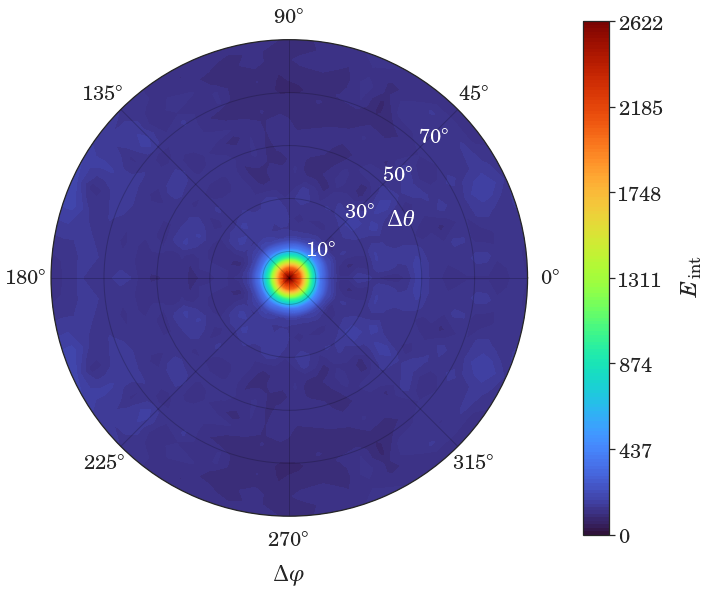

In [13]:
nreg = 0.45
fig = msevn.mstm_polar_plot.e_int(res[nreg], kind='t', dtheta=dtheta0_90, dphi=dphi)
fig.savefig(f'../tex/components/img/celes/e_int_rad_20nm_20deg_nonreg{nreg}.pdf', bbox_inches='tight')

In [34]:
dphi

array([  0.        ,   6.20689655,  12.4137931 ,  18.62068966,
        24.82758621,  31.03448276,  37.24137931,  43.44827586,
        49.65517241,  55.86206897,  62.06896552,  68.27586207,
        74.48275862,  80.68965517,  86.89655172,  93.10344828,
        99.31034483, 105.51724138, 111.72413793, 117.93103448,
       124.13793103, 130.34482759, 136.55172414, 142.75862069,
       148.96551724, 155.17241379, 161.37931034, 167.5862069 ,
       173.79310345, 180.        ])

In [ ]:
# dtheta 12, dphi 5

In [37]:
np.where(dtheta0_90 == 52.5)

(array([14]),)

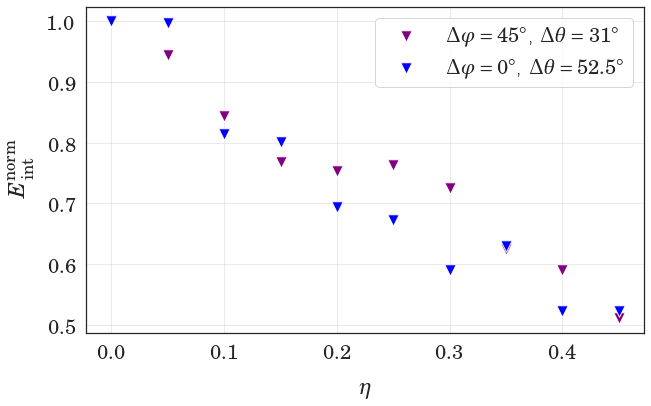

In [44]:
# res[nreg][12, 5]
import matplotlib.pyplot as plt
import seaborn as sns

x = sorted(list(res.keys()))
y = [res[f][12, 5] for f in x]
y = [s / y[0] for s in y]

y2 = [res[f][14, 0] for f in x]
y2 = [s / y2[0] for s in y2]

fig, ax = plt.subplots(figsize=(10, 6))
sns.scatterplot(x=x, y=y, s=130, marker='v', color='purple', label=r'$\Delta \varphi = 45^\circ$, $\Delta \theta = 31^\circ$')
sns.scatterplot(x=x, y=y2, s=130, marker='v', color='blue', label=r'$\Delta \varphi = 0^\circ$, $\Delta \theta = 52.5^\circ$')

ax.set_xlabel(r'$\eta$', labelpad=15)
ax.set_ylabel(r'$E_{\rm{int}}^{\rm{norm}}$', labelpad=15)

fig.savefig('../tex/components/img/celes/energy_vs_nonreg.pdf', bbox_inches='tight')

In [28]:
import re

root = './matlab/output/noscaled'
#fname = 'cylinder_15edge_249gap_50radius_0.0nonreg_1.8702m_15deg_TEpol_83wav_800bw.mat'


dphi = np.linspace(0, 180, 30)
dtheta0_90 = np.linspace(0, 90, 25)
dtheta90_180 = np.linspace(90, 180, 25)

eint0_90_global = np.zeros(shape=(dtheta0_90.size, dphi.size))
eint90_180_global = np.zeros(shape=(dtheta90_180.size, dphi.size))

files = filter(lambda x: x.endswith('.mat'), os.listdir(root))
#files = filter(lambda x: re.search('15deg', x), files)

eint_storage = {}

#eint0_90_global = np.load('shet.npy')

for fname in files:

    wavelength = float(re.search(r'[\d\.]+(?=wav)', fname).group())

    eint0_90 = msevn.mstm_est.e_int(
            matpath=os.path.join(root, fname),
            dphi=dphi,
            dtheta=dtheta0_90,
            thickness=msevn.mstm_est.thickness(15, 200, 50)
        )

    eint0_90_global += get_rel_amp(wavelength)**2 * eint0_90
    eint_storage[wavelength] = get_rel_amp(wavelength)**2 * eint0_90

    # eint90_180 = msevn.mstm_est.e_int(
    #         matpath=os.path.join(root, fname),
    #         dphi=dphi,
    #         dtheta=dtheta90_180,
    #         thickness=msevn.mstm_est.thickness(15, 249, 50)
    #    )

    # eint90_180_global += get_rel_amp(wavelength) * eint90_180

100%|██████████| 30/30 [04:59<00:00,  9.98s/it]


In [3]:
dphi = np.linspace(0, 180, 30)
dtheta0_90 = np.linspace(0, 90, 25)

In [4]:
eint_storage = dict(
    (wl, np.load(f'fuckin_shit_{wl}wl.npy'))
    for wl in [69.16, 75.45, 83.0, 92.2, 103.75]
)

eint_glob = sum(list(eint_storage.values()))

In [29]:
# for k, v in eint_storage.items():
#     np.save(f'fuckin_shit_{k}wl.npy', v)

/home/misery7100/GitLibrary/Magistracy/Article-I/computations/processing/msevn/mstm/plotting/polar.py:58: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([r'$' + str(i) + r'^{\circ}$' for i in range(0, 360, 45)])


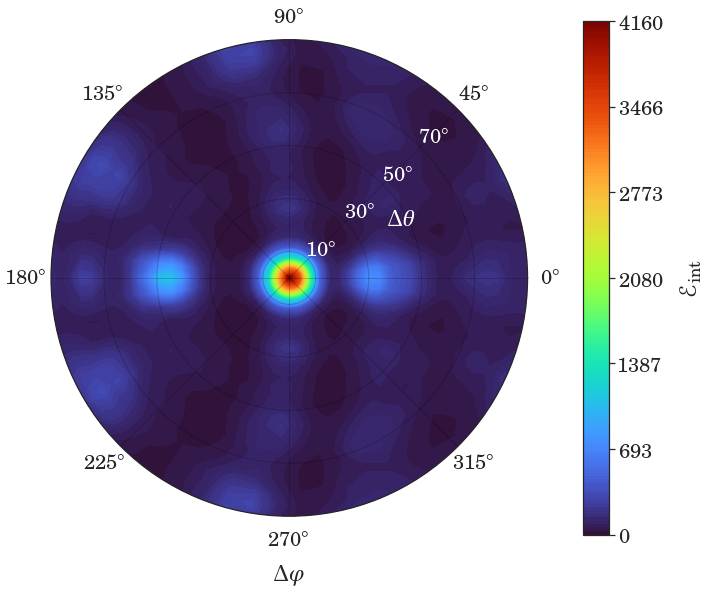

In [6]:
fig = msevn.mstm_polar_plot.e_int(eint_glob, kind='t', dtheta=dtheta0_90, dphi=dphi, cbarlabel=r'$\EuScript{E}_{\rm{int}}$')
#fig.savefig(f'../tex/components/img/celes/e_int_wavepacket8..12_rad_20nm_15deg.pdf', bbox_inches='tight')

/home/misery7100/GitLibrary/Magistracy/Article-I/computations/processing/msevn/mstm/plotting/polar.py:57: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([r'$' + str(i) + r'^{\circ}$' for i in range(0, 360, 45)])


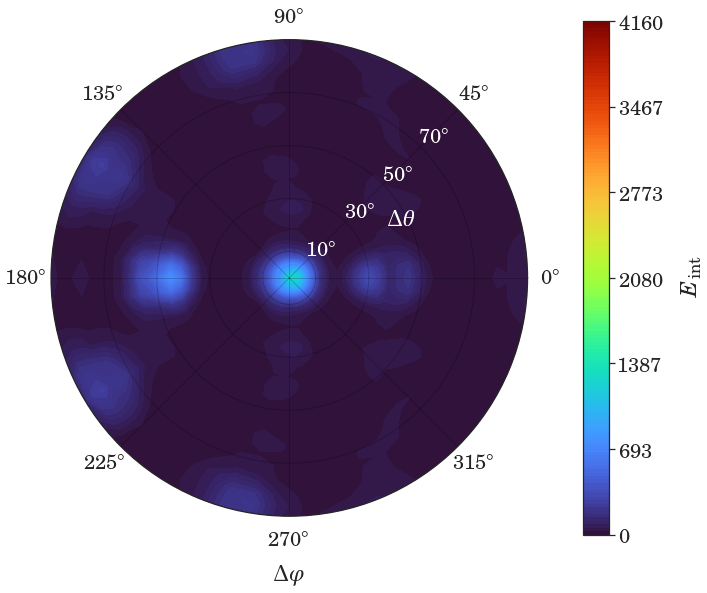

In [7]:
import matplotlib.pyplot as plt

fig = msevn.mstm_polar_plot.e_int(eint_storage[83], kind='t', dtheta=dtheta0_90, dphi=dphi, max_hardcoded=4160, no_colorbar=False)
#fig.savefig(f'../tex/components/img/celes/e_int_wavepacket10_rad_20nm_15deg.pdf', bbox_inches='tight')

#ax = plt.gca()

/home/misery7100/GitLibrary/Magistracy/Article-I/computations/processing/msevn/mstm/plotting/polar.py:46: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([r'$' + str(i) + r'^{\circ}$' for i in range(0, 360, 45)])


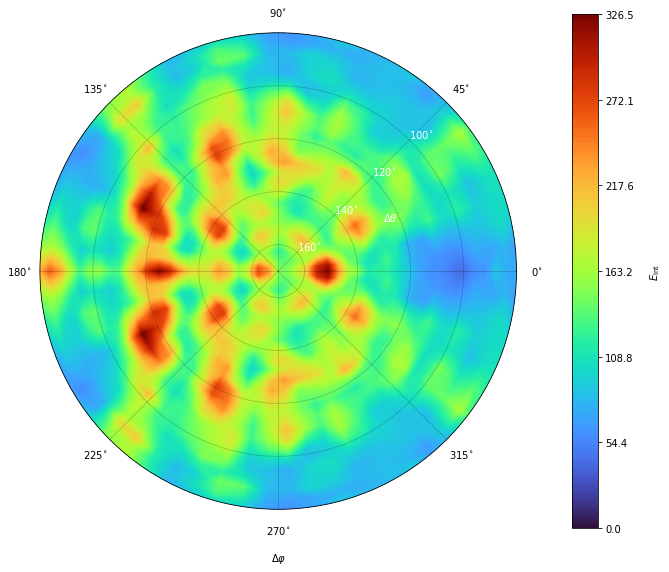

In [6]:
fig = msevn.mstm_polar_plot.e_int(eint90_180_global, kind='r', dtheta=dtheta90_180, dphi=dphi)
#fig.savefig(f'../tex/components/img/celes/e_int_cylinder_15edge_theta0_15_phi0_0_249gap_rad50nm_refr.pdf', bbox_inches='tight')